(tropical_clouds)=
# Week 3 worksheet: Tropical clouds -- solution

1. Download the [tropical_subset.nc](https://www.dropbox.com/scl/fi/dfj80s9q920ljni5aakfc/tropical_subset.nc?rlkey=2fc2wr2yb70e4i6l9c7gwcyj3&dl=0) netcdf file
   I put it in /Users/phil/Dropbox/phil_files/a405/data/tropical_subset.nc

2. Find out what is in it with ncdump

In [1]:
!ncdump -h /Users/phil/Dropbox/phil_files/a405/data/tropical_subset.nc

netcdf tropical_subset {
dimensions:
	x = 100 ;
	y = 110 ;
	z = UNLIMITED ; // (112 currently)
	time = UNLIMITED ; // (1 currently)
variables:
	float x(x) ;
		string x:units = "m" ;
	float y(y) ;
		string y:units = "m" ;
	float z(z) ;
		string z:units = "m" ;
		string z:long_name = "height" ;
	float time(time) ;
		string time:units = "d" ;
		string time:long_name = "time" ;
	float p(z) ;
		string p:units = "mb" ;
		string p:long_name = "pressure" ;
	float U(time, z, y, x) ;
		string U:long_name = "X Wind Component" ;
		string U:units = "m/s" ;
	float V(time, z, y, x) ;
		string V:long_name = "Y Wind Component" ;
		string V:units = "m/s" ;
	float W(time, z, y, x) ;
		string W:long_name = "Z Wind Component" ;
		string W:units = "m/s" ;
	float PP(time, z, y, x) ;
		string PP:long_name = "Pressure Perturbation" ;
		string PP:units = "Pa" ;
	float TABS(time, z, y, x) ;
		string TABS:long_name = "Absolute Temperature" ;
		string TABS:units = "K" ;
	float QV(time, z, y, x) ;
		string QV:long_

The file contains a single timestep from the simulation I showd in [my day1 slides](https://phaustin.github.io/talks/cloud_talk.html).  The variables that we're interested in
right now are the absolute temperature TABS, the pressure $p$ and the pressure perturbation $PP$.

In [2]:
from pathlib import Path
import xarray as xr
the_file = Path.home() / "Dropbox/phil_files/a405/data/tropical_subset.nc"
the_ds = xr.open_dataset(the_file)

In [3]:
the_ds

<xarray.Dataset>
Dimensions:  (x: 100, y: 110, z: 112, time: 1)
Coordinates:
  * x        (x) float32 1e+04 1.01e+04 1.02e+04 ... 1.97e+04 1.98e+04 1.99e+04
  * y        (y) float32 4e+04 4.01e+04 4.02e+04 ... 5.07e+04 5.08e+04 5.09e+04
  * z        (z) float32 25.0 75.0 125.0 175.0 ... 8.248e+03 8.348e+03 8.448e+03
  * time     (time) float32 0.29
Data variables:
    p        (z) float32 ...
    U        (time, z, y, x) float32 ...
    V        (time, z, y, x) float32 ...
    W        (time, z, y, x) float32 ...
    PP       (time, z, y, x) float32 ...
    TABS     (time, z, y, x) float32 ...
    QV       (time, z, y, x) float32 ...
    QN       (time, z, y, x) float32 ...
    QP       (time, z, y, x) float32 ...

In [4]:
the_ds['p'].data

array([1009.132, 1003.417,  997.726,  992.06 ,  986.417,  980.799,
        975.203,  969.633,  964.088,  958.568,  953.073,  947.603,
        942.157,  936.736,  931.341,  925.971,  920.625,  915.305,
        910.01 ,  904.739,  899.494,  894.274,  889.078,  883.907,
        878.761,  873.607,  868.41 ,  863.17 ,  857.888,  852.563,
        847.195,  841.786,  836.334,  830.839,  825.303,  819.726,
        814.107,  808.445,  802.744,  797.001,  791.217,  785.392,
        779.528,  773.623,  767.679,  761.695,  755.671,  749.609,
        743.508,  737.369,  731.191,  724.975,  718.722,  712.432,
        706.106,  699.744,  693.345,  686.911,  680.443,  673.94 ,
        667.405,  660.836,  654.237,  647.605,  640.943,  634.252,
        627.532,  620.784,  614.008,  607.207,  600.38 ,  593.528,
        586.653,  579.754,  572.835,  565.894,  558.934,  551.955,
        545.001,  538.122,  531.316,  524.582,  517.919,  511.327,
        504.804,  498.35 ,  491.963,  485.644,  479.392,  473.

## Taylor's series expansion of the equation of state

Consider this equation from the
[Wikipedia entry on Taylor series](http://en.wikipedia.org/wiki/Taylor_series)

$$
\begin{align}
f(x,y) & \approx f(a,b) +(x-a)\, f_x(a,b) +(y-b)\, f_y(a,b)\nonumber \\
&  + \frac{1}{2!}\left[ (x-a)^2\,f_{xx}(a,b) + 2(x-a)(y-b)\,f_{xy}(a,b) +(y-b)^2\, f_{yy}(a,b) \right]
\end{align}
$$ (eq:taylor)
where $f_{xy} = \frac{ \partial^2 f}{\partial x \partial y }$, etc. You should be able to show
that if you expand $f=p=\rho R_d T$ about the point 
$p_0(z) = \rho_0(z) R_d T_0(z)$ where $p_0,\ \rho_0,\ T_0$ are the pressure,
density and temperature at height $z$ for a hydrostatic atmosphere.  Using {eq}`eq:taylor` with $a=\rho_0$ and $b=T_0$ you should be able to show that
to second order: 


$$
\frac{\Delta p}{p_0} = \frac{\Delta T}{T_0} + \frac{\Delta \rho}{\rho_0} + \frac{\Delta T \Delta \rho}{T_0 \rho_0}
$$ (eq:full)

Note that $\Delta p$, $\Delta T$, and $\Delta \rho$ are all functions of
(t,x,y,z).

If the atmosphere is close to hydrostatic balance, then we can expect the $\Delta$ differences to be small if $p_0$ is the hydrostatic pressure, and we can drop the
$\frac{ \Delta T \Delta \rho}{T_0 \rho_0}$ term and write

$$
\frac{\Delta p}{p_0} = \frac{\Delta T}{T_0} + \frac{\Delta \rho}{\rho_0}
$$

We will show later that away from active convection we also can expect $\frac{\Delta p }{p_0}$ to be small.



## Todo


1.  find the index of the vertical level that is closes to 500 m
2.   For that plot calculate histograms of all of the quantities in {eq}`eq:full`.  How much larger are the temperature and density terms that the pressure term?  How about the second order density x pressure term?

Userful reference:  [xarray plotting](https://docs.xarray.dev/en/latest/user-guide/plotting.html)

Hint for finding a level closest to 500 meters. Make sure you understand why this works:

In [5]:
import numpy as np
from matplotlib import pyplot as plt
heights = the_ds['z'].data
height_diff = heights - 500
the_lev = np.argmin(np.abs(height_diff))
print(f"{the_lev=} and {heights[the_lev]=}")

the_lev=9 and heights[the_lev]=475.0


## Solution

In [6]:
Tvals = the_ds['TABS'][0,the_lev,:,:]
T0 = Tvals.mean(dim=['x','y'])
T_prime = Tvals - T0
T_term = T_prime/T0

pressPa = the_ds['p'][the_lev]*100.  # pascals
Rd = 287 #J/kg/K
rho_vals = pressPa/(Rd*Tvals)
rho0 = rho_vals.mean(dim=['x','y'])
rho_prime = rho_vals - rho0
rho_term = rho_prime/rho0

squared_term = rho_prime*T_prime/(rho0*T0)

press_perturb = the_ds['PP'][0,the_lev,:,:]
press_term = press_perturb/pressPa

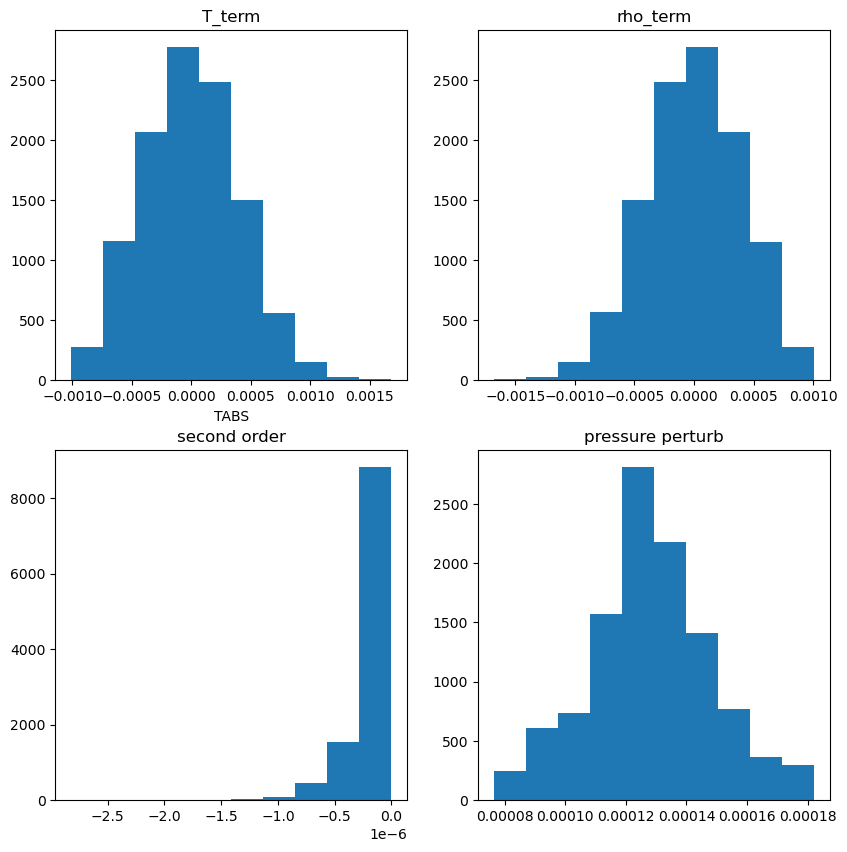

In [7]:
fig, ax= plt.subplots(2,2,figsize = (10,10))
ax1, ax2, ax3, ax4 = ax.flat
T_term.plot.hist(ax = ax1)
rho_term.plot.hist(ax = ax2)
squared_term.plot.hist(ax=ax3)
press_term.plot.hist(ax=ax4)
ax1.set_title('T_term')
ax2.set_title('rho_term')
ax3.set_title('second order')
ax4.set_title('pressure perturb');